# Explore

In [28]:
import wrangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
import os
from pprint import pprint
from datetime import datetime as dt


def get_news_articles():
    url = "https://inshorts.com/en/read"
    # set different categories to perse through
    category = ["business", "sports", "technology", "entertainment"]

    articles = {}
    df_setup = []
    for cat in category:
        # read the url
        res = get(url + "/" + category[0])
        print(res)

        # create a beautiful soup object
        soup_parser = BeautifulSoup(res.content, 'html.parser').body

        soup = soup_parser.find_all("span", itemprop="mainEntityOfPage")
        for i in range(len(soup)):
            link = soup[i]["itemid"]

            article = get(link)
            article_soup = BeautifulSoup(article.content,"html.parser").body

            article_title = article_soup.find('span', itemprop='headline').text
            article_body = article_soup.find('div', itemprop='articleBody').text
            # articles[f"article {cat} {i}"] = [article_title, cat ,link ,article_body]

            article_instance = {
                'title': article_title,
                'content': article_body,
                'category': cat,
            }

            df_setup.append(article_instance)
    return pd.DataFrame(df_setup)

In [2]:
rating = get_news_articles()

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


**prep data**

In [10]:
train, val, test = wrangle.prep_readmes(rating, "content")

In [16]:
# Generate random numbers between 1 and 5
random_numbers = np.random.randint(1, 6, size=len(train))
train["stars"] = random_numbers
train.head()

,title,content,category,cleaned_content,lemmatized,stars
4,Rice exporters who paid duties before ban can ...,The government clarified that it would allow s...,business,the government clarified that it would allow s...,government clarified would allow shipment trap...,5
11,BHEL gets NTPC order for thermal power project...,Bharat Heavy Electricals Limited (BHEL) said i...,sports,bharat heavy electricals limited bhel said it ...,bharat heavy electricals limited bhel said sec...,3
33,"HC asks govt, Delhi to take action on illegal ...",Delhi High Court directed the Centre and the D...,entertainment,delhi high court directed the centre and the d...,delhi high court directed centre delhi governm...,1
3,"HC asks govt, Delhi to take action on illegal ...",Delhi High Court directed the Centre and the D...,business,delhi high court directed the centre and the d...,delhi high court directed centre delhi governm...,1
39,LTIMindtree gives several employees 0% hike af...,IT firm LTIMindtree has given several employee...,entertainment,it firm ltimindtree has given several employee...,firm ltimindtree given several employee 0 hike...,5


1. **Are there differences in word/words distribution between different binned star rating categories?**

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

In [20]:
# Define bin edges
bin_edges = [0, 1, 2, 3, 4, 5]

# Define bin labels
bin_labels = ['One', 'Two', 'Three', 'Four', "Five"]

# Bin the 'Values' column
train['binned_tars'] = pd.cut(train['stars'], bins=bin_edges, labels=bin_labels)
train.head(2)

,title,content,category,cleaned_content,lemmatized,stars,binned_tars
4,Rice exporters who paid duties before ban can ...,The government clarified that it would allow s...,business,the government clarified that it would allow s...,government clarified would allow shipment trap...,5,Five
11,BHEL gets NTPC order for thermal power project...,Bharat Heavy Electricals Limited (BHEL) said i...,sports,bharat heavy electricals limited bhel said it ...,bharat heavy electricals limited bhel said sec...,3,Three


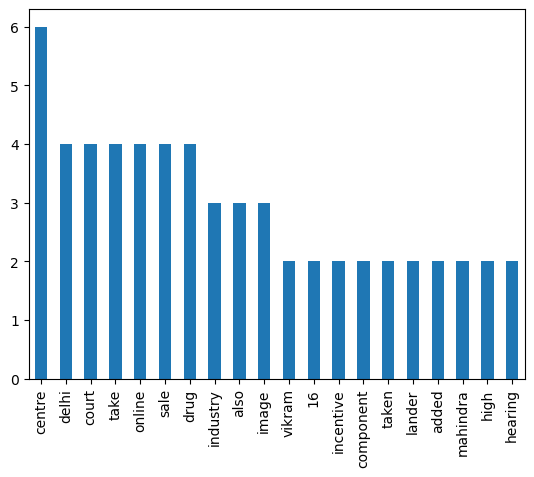

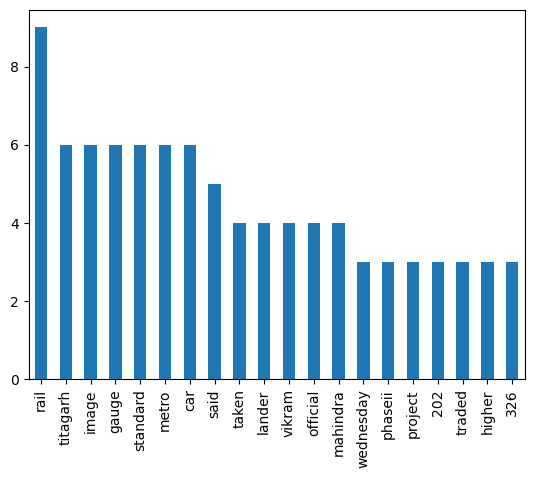

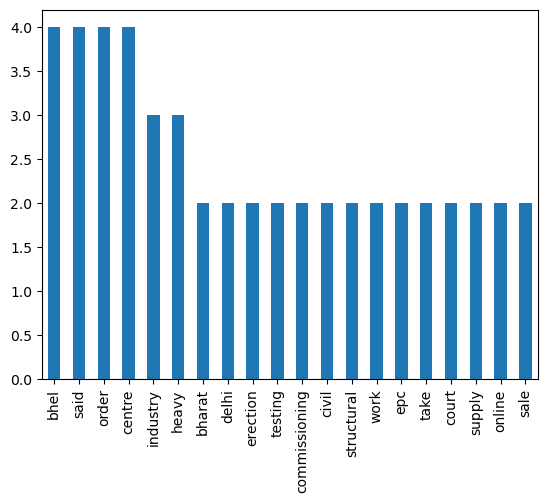

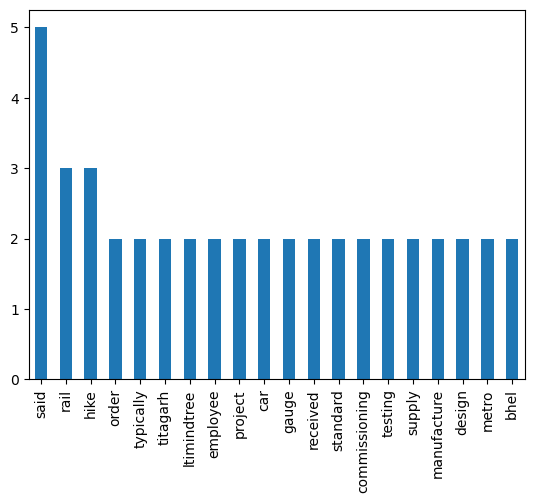

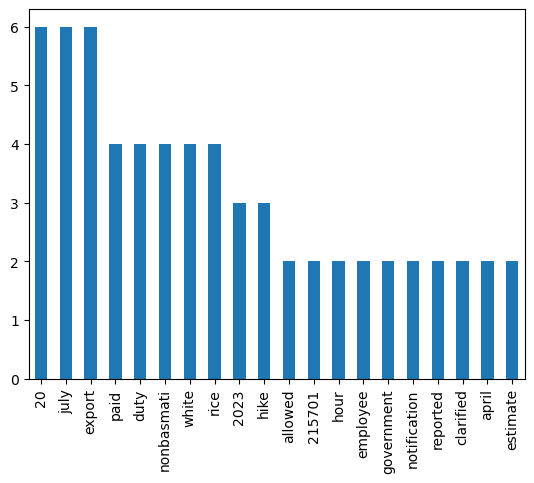

In [31]:
# Create a subplot for all bin labels
num_bins = len(bin_labels)
# fig, axes = plt.subplots(nrows=num_bins, ncols=1, figsize=(8, 5*num_bins))

for i in bin_labels:
    # Filter data for the current bin label
    bin_data = train.lemmatized[train.binned_tars == i]
    
    # Calculate word counts
    pd.Series(" ".join(bin_data).split()).value_counts().head(20).plot(kind="bar")
    plt.show()


**2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?**
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

5. Are there any topics that seem to have a stronger association with higher or lower star ratings between all the companies?